# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# import packages
import numpy as np
import pickle
import pandas as pd

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = r'C:\Users\bquach\Documents\bqauto\data\traffic-signs-data\train.p'
testing_file = r'C:\Users\bquach\Documents\bqauto\data\traffic-signs-data\test.p'
signnames_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
sign_names = pd.DataFrame.from_csv(signnames_file)
sign_names = sign_names.to_dict()['SignName']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

C:\Users\bquach\AppData\Local\Continuum\Anaconda\envs\auto\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


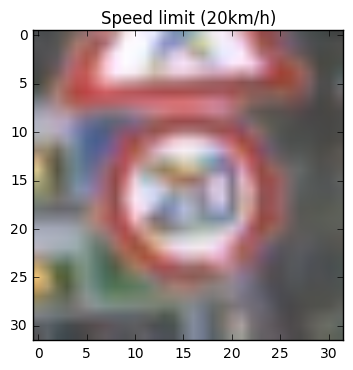

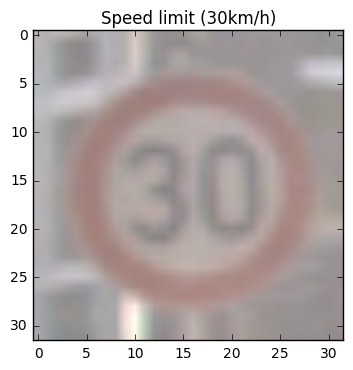

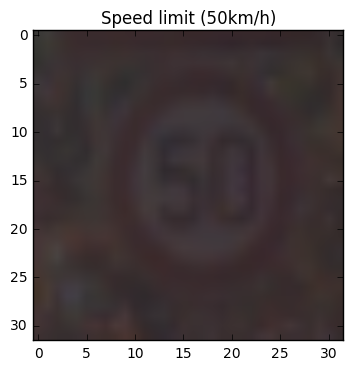

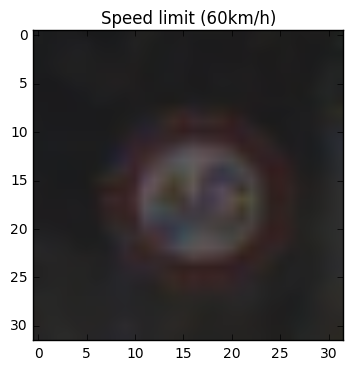

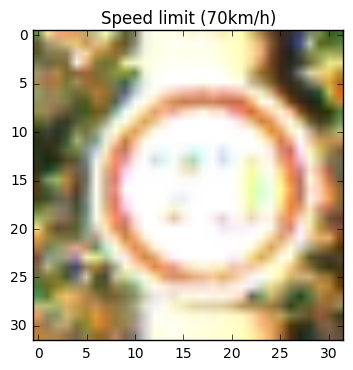

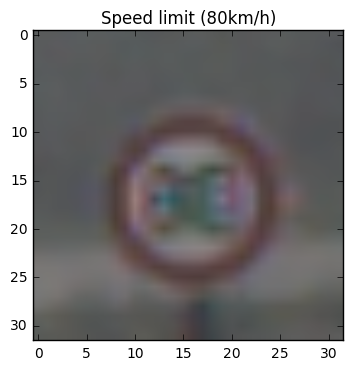

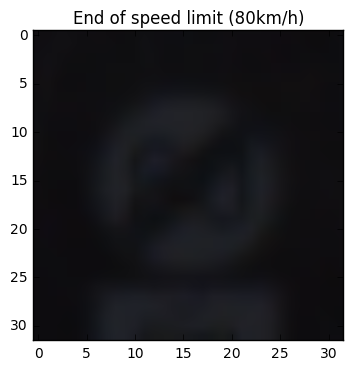

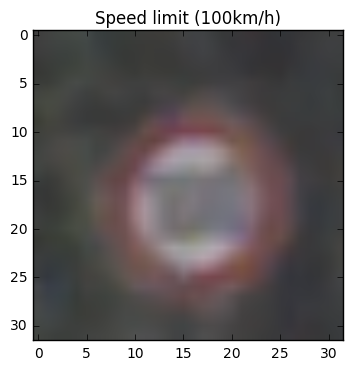

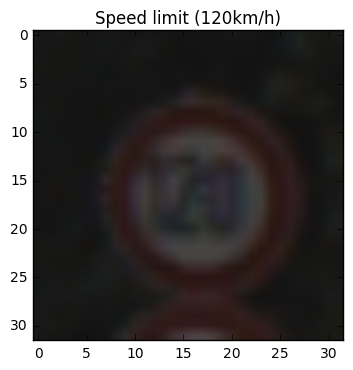

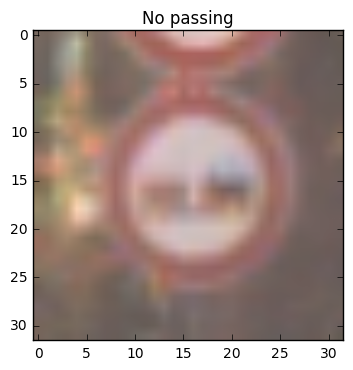

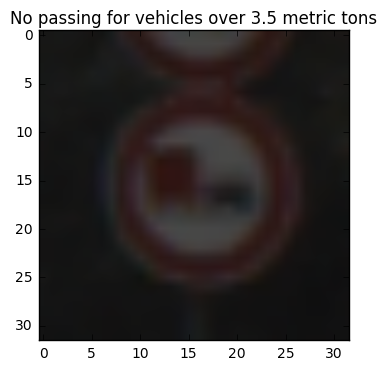

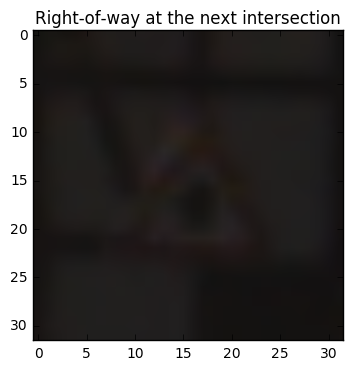

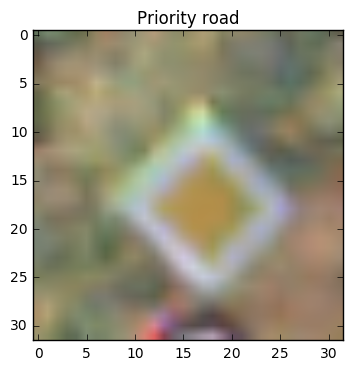

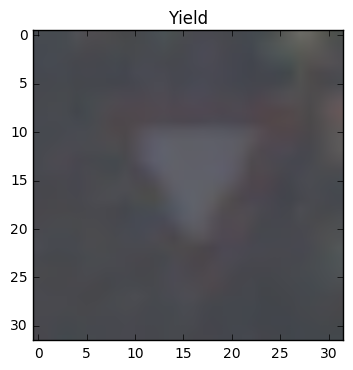

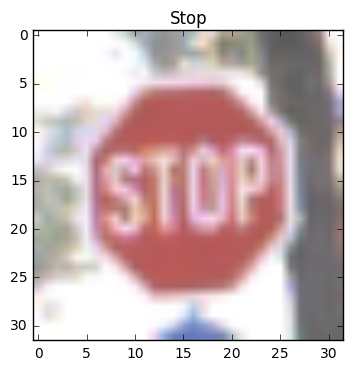

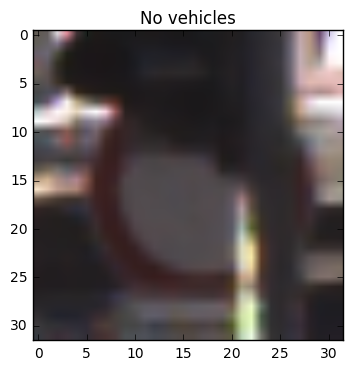

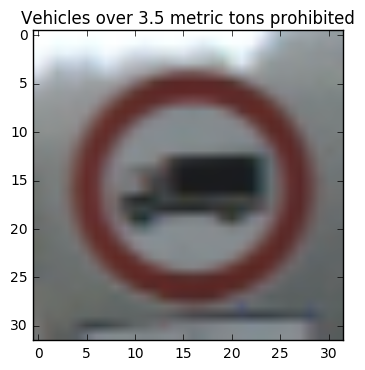

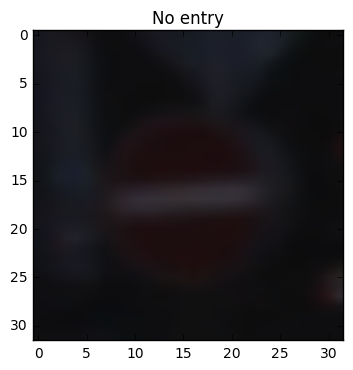

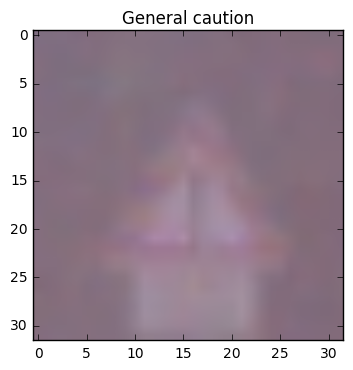

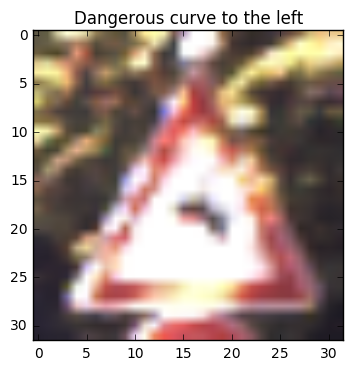

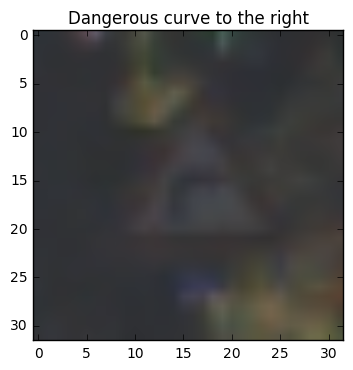

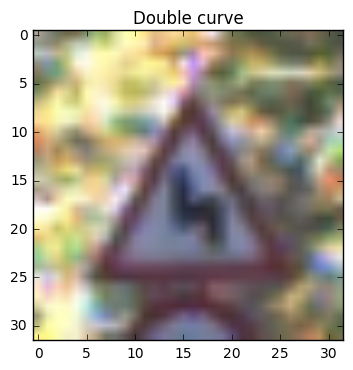

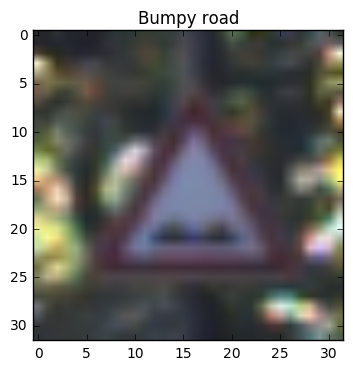

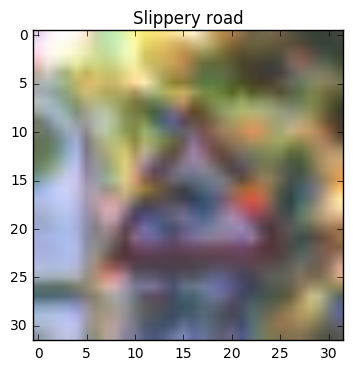

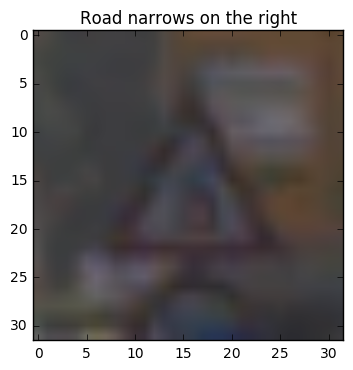

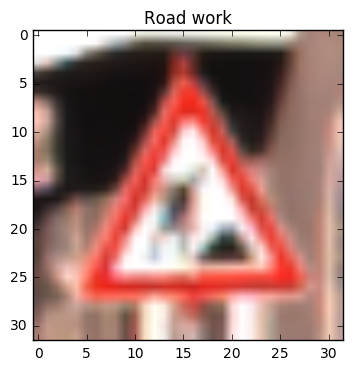

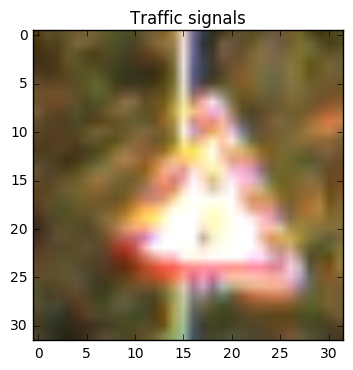

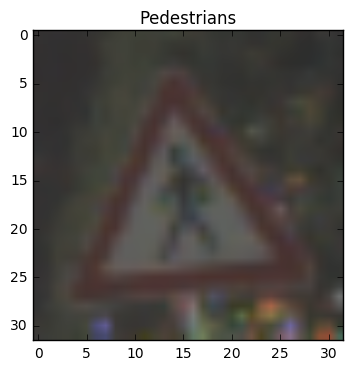

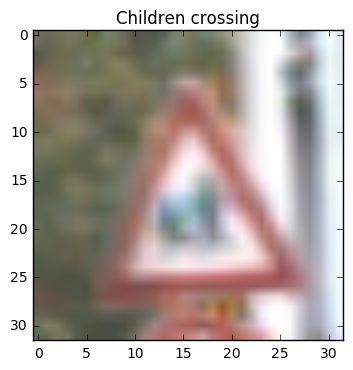

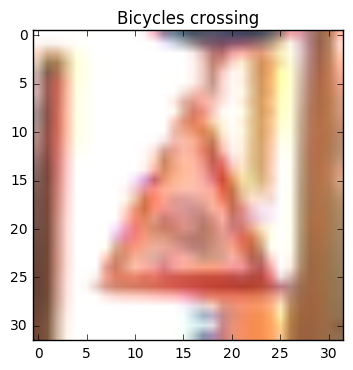

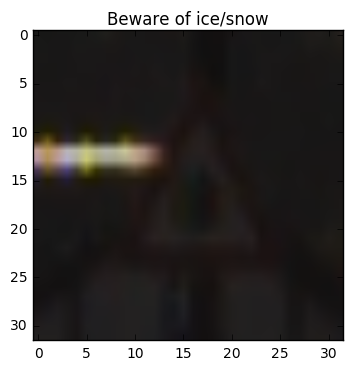

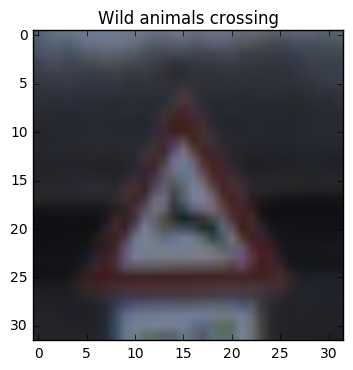

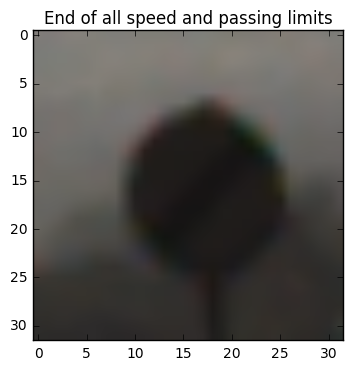

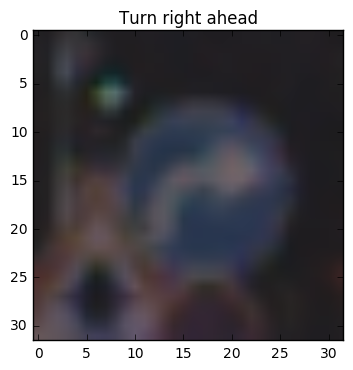

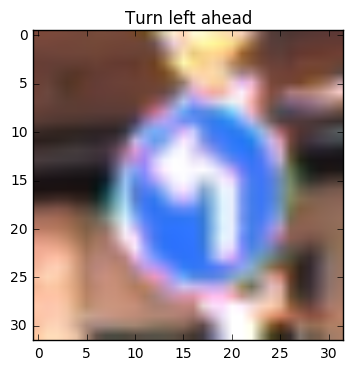

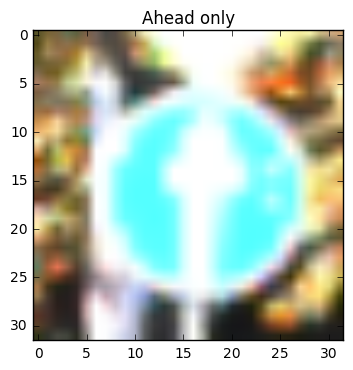

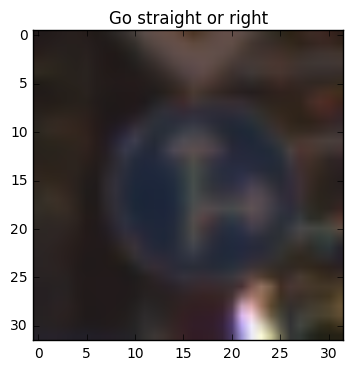

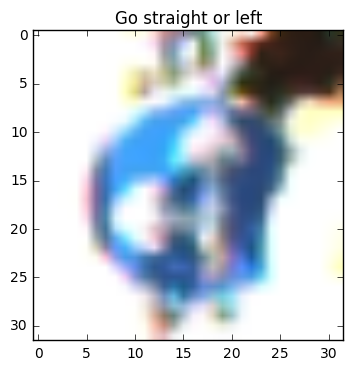

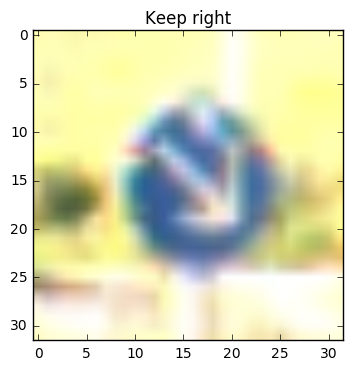

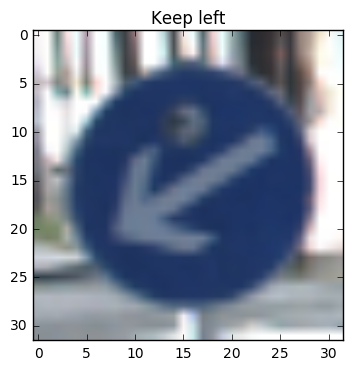

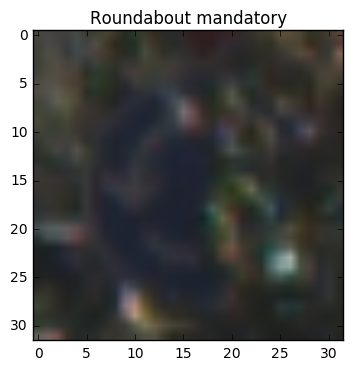

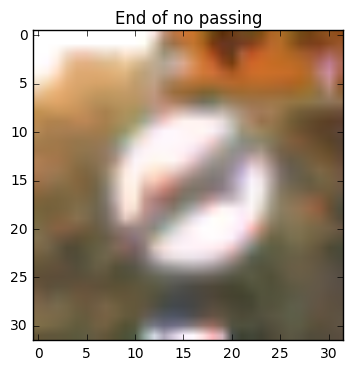

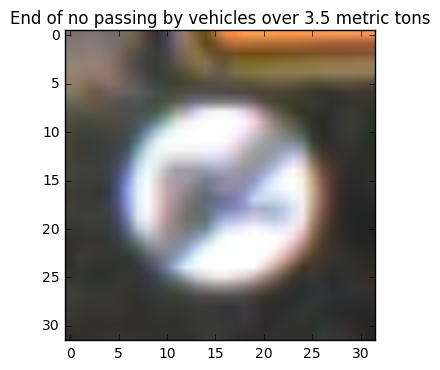

In [5]:
for label in set(train['labels']):
    label_indexes = train['labels'] == label
    plt.figure()
    plt.imshow(train['features'][label_indexes][0])
    plt.title(sign_names[label])

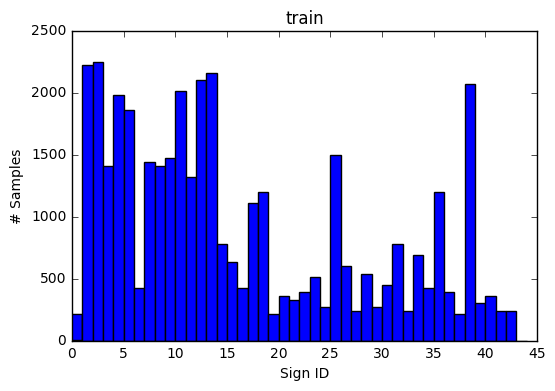

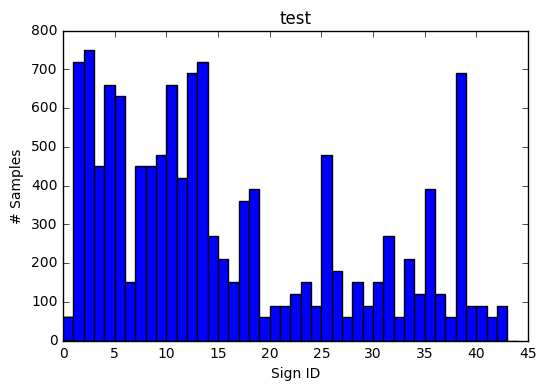

In [6]:
for label,myset in zip(['train','test'],[train,test]):
    plt.figure()
    plt.hist(myset['labels'],bins=range(45))
    plt.xlabel('Sign ID')
    plt.ylabel('# Samples')
    plt.title(label)

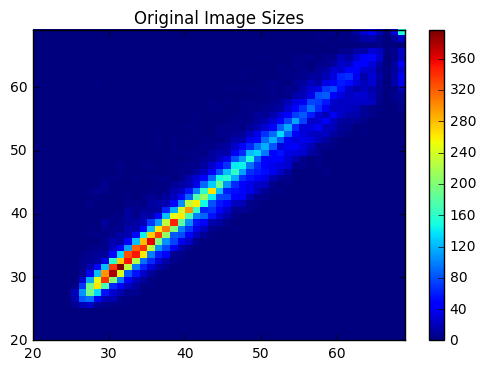

In [7]:
widths = train['sizes'][:,0]
heights = train['sizes'][:,1]
plt.hist2d(widths,heights,bins=range(20,70))
plt.colorbar()
plt.title('Original Image Sizes')

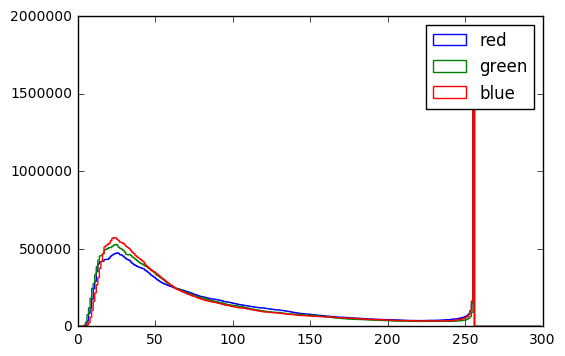

In [8]:
plt.hist(train['features'][:,:,:,0].flatten(),bins=range(300),histtype='step',label='red')
plt.hist(train['features'][:,:,:,1].flatten(),bins=range(300),histtype='step',label='green')
plt.hist(train['features'][:,:,:,2].flatten(),bins=range(300),histtype='step',label='blue')
plt.legend(loc='best')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
X_train = train['features']
y_train = train['labels']

# Scale to 0-1.
X_train = X_train/255.0
X_test = X_test/255.0

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_



**Answer:** Divided by 255 then subtract 0.5 to get range roughly -1 - +1.  This is because most activation funcions have their largest changes near 0. So you want the initial guesses (features * weights) to be near 0 so that small changes in weights lead to signficant changes in node values.  Given this setup worked so well straight out of the box, I'm not sure this helps for this particular problem, but it's good practice.  

I didn't do too much more (such as changing color space) since the performance is already pretty good

In [10]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle



# Shuffle to randomize training order and also divide into train/val
X_train, y_train = shuffle(X_train,y_train)

num_take_for_val = int(len(X_train)*0.20)
X_val = X_train[:num_take_for_val]
y_val = y_train[:num_take_for_val]

X_train = X_train[num_take_for_val:]
y_train = y_train[num_take_for_val:]



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_


**Answer:** 
I shuffled the data, which serves two purposes.  First, it randomizes the order of training data so that batch's gradients are similar.  Otherwise we might get oscillating gradients.  Second purpose it is allows easy segmentation for the train and validation set.  I just have to take the first few samples of the shuffled data (20% in this case), which corresponds to a random sample.

I did not generate new data, but if I did, I could have changed overall brightness

In [11]:
import tensorflow as tf

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def modified_lenet(x):    
    '''Based on LeNet implementation from class material
    '''
    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Relu Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I just used the LeNet model.

Input layer
===========
Input: 32 x 32 pixel images, with 3 channels representing RGB

Conv1 
-----
Input: 32 x 32 x 3 images
Output: 28 x 28 x 6
Activation: Relu

Convolution with kernal size 5x5 pixels with 6 feature maps and a stride of 1.  It's valid padding, so the output size is 32 - (kernal size - 1).  

Max Pooling
-----------
Input: 28 x 28 x 6
Output: 14 x 14 x 6

Max pooling with 2 x 2 window, stride 2. Valid padding and stride 2 so output is 1/2 of input pixel size.  Number feature maps stays the same.


Conv2
-----
Input: 14 x 14 x 6
Output: 10 x 10 x 16
Relu

Here we increase the number feature maps significantly. Kernal is 5 x 5 x 16 so it's 16 feature maps. Stride of 1 with valid padding means output will be 14 - (kernal size - 1). 

Max Pooling
-----------
Input: 10 x 10 x 16
Output: 5 x 5 x 16

Same as previous max pooling.  Max pooling with 2 x 2 window, stride 2. Valid padding and stride 2 so output is 1/2 of input pixel size.  Number feature maps stays the same.

Fully Connected Layers
======================

Flatten
-------
Input: 5 x 5 x 16
Output: 1 x 400

Now we flatten to do the classical NN. Output size is just the product of 5x5x16.  We just roll out the image into one 1D vector.  Values stay the same.

FC 1
----
Input: 1 x 400
Output: 1 x 120
Relu

There's 120 layers in this hidden layer so with 400 inputs, the number of parameters is the product 400x120 = 48,000.  Sounds like a lot to me, but I guess its proven to work. 

FC 2
----
Input: 1 x 120
Output: 1 x 84
Relu

Second hidden layer has 84 nodes.  I'm not sure why they picked that number. 

Output Layer
============
Input: 1 x 84
Output: 1 x 43
(No activation here, just return logit)

Now we do what amounts to a matrix multiplication to cast the final 84 hidden nodes to the 43 classes and return the raw logits. 


In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = modified_lenet(x)
prediction_operation = tf.argmax(logits, 1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
# Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    prediction_list = []
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [15]:
EPOCHS = 20
BATCH_SIZE = 128


validation_accuracy_list = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_val, y_val)
        validation_accuracy_list.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.705

EPOCH 2 ...
Validation Accuracy = 0.886

EPOCH 3 ...
Validation Accuracy = 0.904

EPOCH 4 ...
Validation Accuracy = 0.927

EPOCH 5 ...
Validation Accuracy = 0.945

EPOCH 6 ...
Validation Accuracy = 0.957

EPOCH 7 ...
Validation Accuracy = 0.963

EPOCH 8 ...
Validation Accuracy = 0.940

EPOCH 9 ...
Validation Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.974

EPOCH 11 ...
Validation Accuracy = 0.972

EPOCH 12 ...
Validation Accuracy = 0.974

EPOCH 13 ...
Validation Accuracy = 0.974

EPOCH 14 ...
Validation Accuracy = 0.976

EPOCH 15 ...
Validation Accuracy = 0.960

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.978

EPOCH 18 ...
Validation Accuracy = 0.977

EPOCH 19 ...
Validation Accuracy = 0.981

EPOCH 20 ...
Validation Accuracy = 0.985

Model saved


In [21]:
# Get logits and predictions
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    validation_prediction = sess.run(prediction_operation, feed_dict={x: X_val})
    test_prediction = sess.run(prediction_operation, feed_dict={x: X_test})
    train_prediction = sess.run(prediction_operation, feed_dict={x: X_train})

In [22]:
print('Validation Acc: %.3f'%np.mean(validation_prediction == y_val))
print('Train Acc: %.3f'%np.mean(train_prediction == y_train))

Validation Acc: 0.985
Train Acc: 0.996


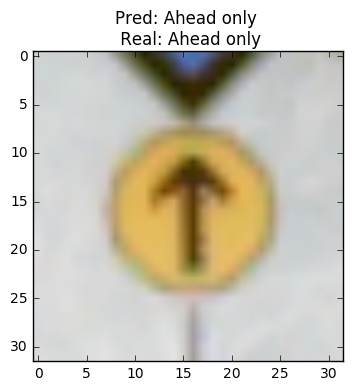

In [23]:
# View some sample outputs from the validation set to check for sanity

i = 0
pred_name = sign_names[validation_prediction[i]]
plt.imshow(X_val[i]*255)
plt.title('Pred: %s \n Real: %s'%(pred_name,sign_names[y_val[i]]))

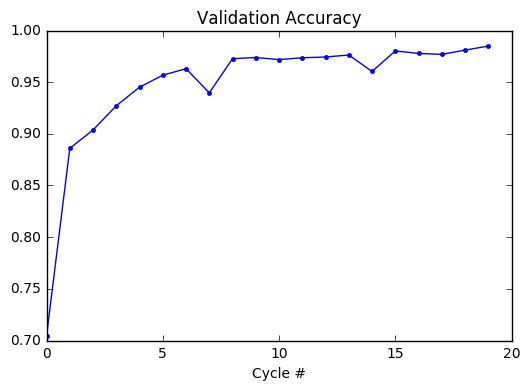

In [24]:
plt.plot(validation_accuracy_list,'.-')
plt.xlabel('Cycle #')
plt.title('Validation Accuracy')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam optimizer with batch size 128 and 20 epochs. Weights were initizalized as truncated normal with 0 mean and 0.1 standard deviation.  Used the validation set to monitor accuracy against epoch(cycle) number.  I didn't generate new data.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used the LeNet architecture, which was originaly designed to reconize handwritten digits.  It did much better than I anticipated so I didn't modify it much.  It works well because of similarities betweent the problems and the ability of ConvNets to recognize digits well.

Simialarities Between the Problems
-----------------------------------
Both have certain curves that help classification. Both have combinations of straight lines in different orientations and circles.  In the case of speed signs, there is actual digit recogniztion needed.  Both are simple enough that they can fit in smaller images, both similarity sized (as opposed to a complex object like a house which has many parts and would probably need more pixels).

Ability of ConvNets to recognize digits
---------------------------------------
Conv nets were developed to recognize objects by looking at atomic stuctures and how they fit into a macrostructure.  For digits, these atomic structures are lines and curves.  The first Conv layer might recognize these.  The second Conv layer would recognize the relative positions of these lines and curves.  It might learn the certain curves when connected form circles or semi circles.  It might learn the a curve with a vertial line on the right are present.  

The final 2 fully connected layers work out the non-spatial logic between these groups of lines and circles.  They recgonize how to combine the knowledge that a line exists AND a circle exists and how to weight the relative importance of each feature.  

Hypothesis on future achitectures
---------------------------------
Parsimony is important. A minimal model should always be preferred, even in the face of decreased performance.  Future directions would be to reduce parameters (bigger max pooling, strides, kernal sizes, less hidden nodes in the fully connected layers).  This may have minimal effect on performance but in cases where computational resources are limited (IOT, hand held devices, lower end products) can be the better choice.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

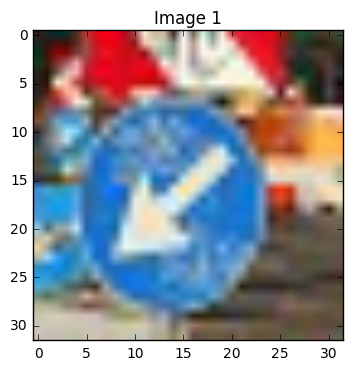

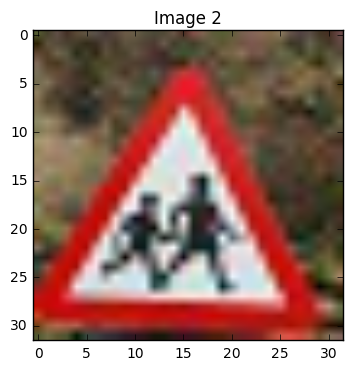

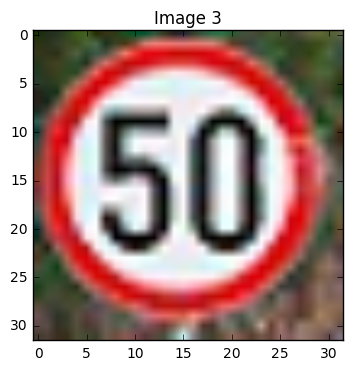

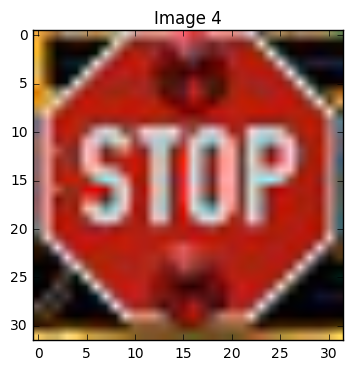

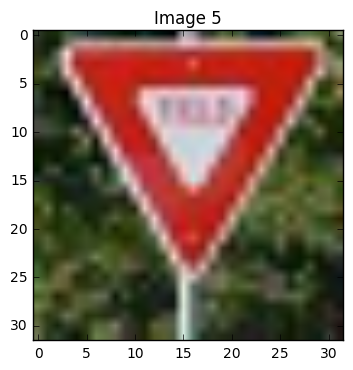

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg


# Images downloaded from web and resized using Microsoft Paint
image_num = 0
pics_dir = '../../data/traffic-signs-data'
image_data = []
for filename in os.listdir(pics_dir):
    if filename[-2:] == '.p': continue
    full_file_name = os.path.join(pics_dir,filename)
    image = mpimg.imread(full_file_name)    
    image_data.append(image)
    plt.figure()
    plt.imshow(image)
    image_num += 1
    plt.title('Image %i'%image_num)
    
image_data = np.array(image_data)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Image 1 had gaffiti in the original image which would have made it difficult to classify yet common in real life. In the downsized version, the graffiti is less obvious but still might be a challenge.

Image 2 is a school crossing sign that I don't see in the training images so curious to see what it will be classified as.

Image 3 looks to be a common sign

Image 4 is a stop sign but it's on a school bus so that's a bit different than on a post

Image 5 is a common yield sign

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    prediction = sess.run(prediction_operation, feed_dict={x: image_data/255.0})

print([sign_names[pred] for pred in prediction])

['Keep left', 'Children crossing', 'Speed limit (30km/h)', 'Stop', 'Priority road']


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

#Image 1:  Prediction: Keep Left.  Actual: Keep left.  good
#Image 2:  Prediction: Children crossing.  Actual:  Children crossing.  good
#Image 3:  Prediction: 30 km/h.  Actual: 50.  bad (but close!)
#image 4:  Prediciton:  Stop  Actual: Stop (on school bus).  good
#Image 5:  Prediction: Priority road Actual: Yield.  bad

3 out of 5, so 60% accuracy. Although the predicting 30 speed limit on a 50 isn't too bad.  I'm surpised the yield sign guess was inaccurate. It seems pretty different than priority road.  Overall it's still not too bad

In [27]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# Get logits and predictions
### Run the predictions here.
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
top_3_probs = tf.nn.top_k(softmax,3)

with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    validation_top3 = sess.run(top_3_probs, feed_dict={x: X_val})
    #test_prediction = sess.run(prediction_operation, feed_dict={x: X_test})
    #train_prediction = sess.run(prediction_operation, feed_dict={x: X_train})

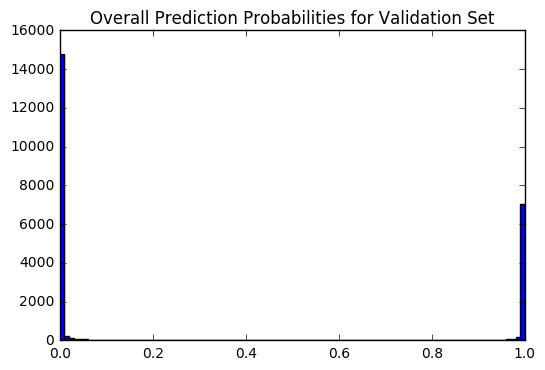

In [28]:
plt.hist(validation_top3.values.flatten(),bins=100)
plt.title('Overall Prediction Probabilities for Validation Set')

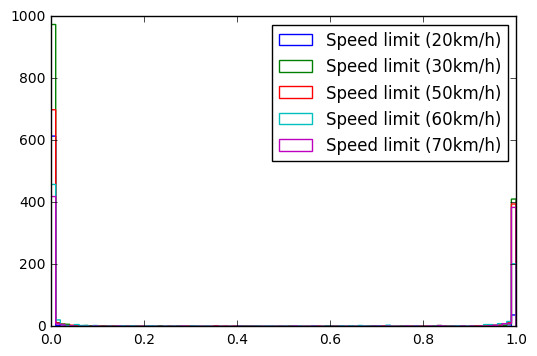

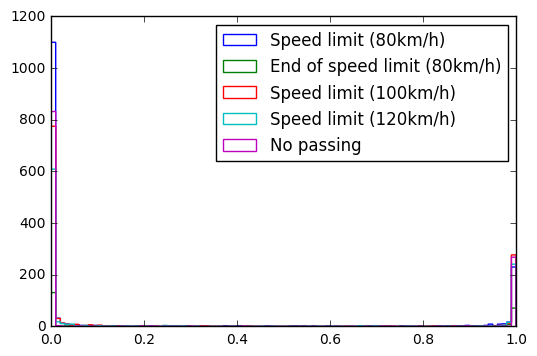

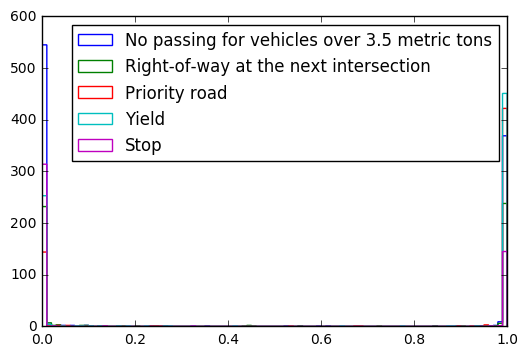

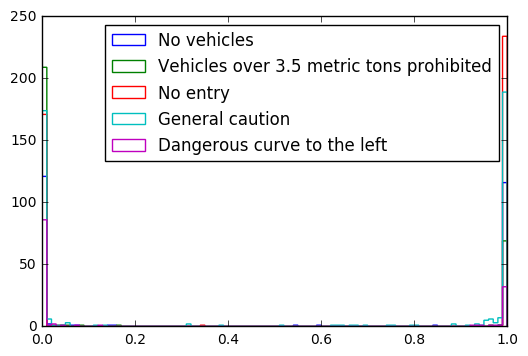

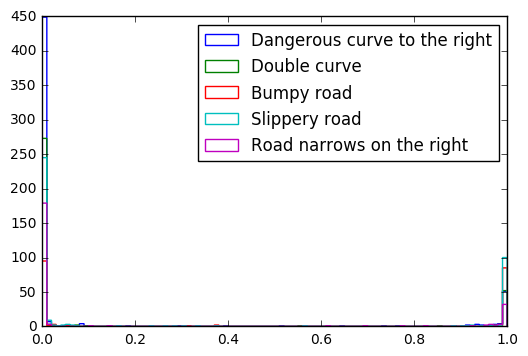

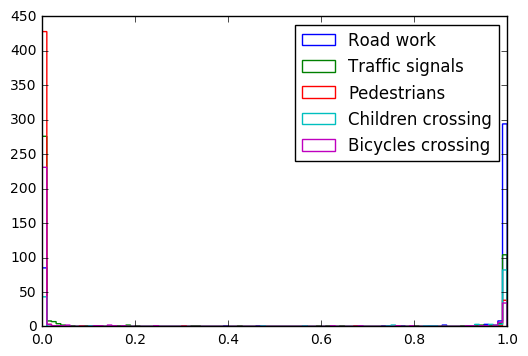

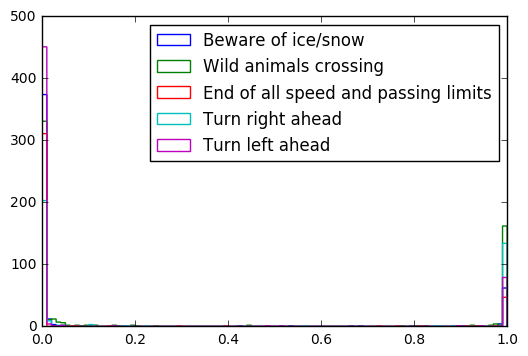

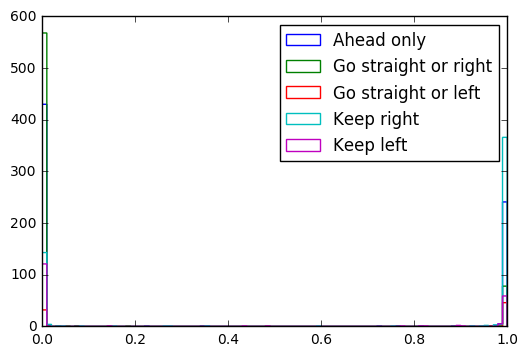

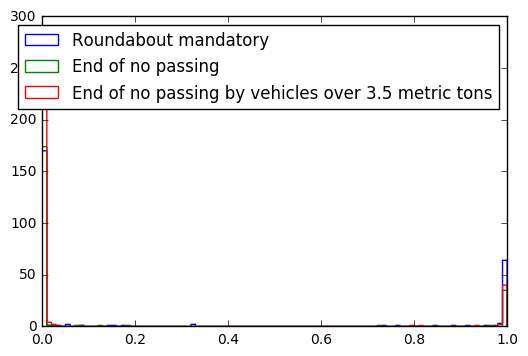

In [29]:
stepsize = 5
for batch_size in list(range(0,42,5)):
    plt.figure()
    for i in range(batch_size,batch_size+stepsize):
        if i >= 43: break
        plt.hist(validation_top3.values[validation_top3.indices==i],bins=100,label=sign_names[i]
                ,histtype='step')
    plt.legend(loc='best')

In [30]:
print('Validation accuracy when any of the top 1 guess counts %.3f'%np.mean(validation_prediction == y_val))
print('Validation accuracy when any of the top 3 guesses counts %.3f'%np.mean(np.any(np.equal(validation_top3.indices,y_val.reshape(7841,1)),1)))

Validation accuracy when any of the top 1 guess counts 0.985
Validation accuracy when any of the top 3 guesses counts 0.997


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The softmax probabilities center around 0 and 1, so the model is quite certain in it's top 3 guesses and thus also it's top guess.

Validation accuracy is 0.985 but goes to 0.997 if "correct" means any of the top 3 guesses are correct.  



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [32]:
# Only evaluate before submitting:
# I promise that I only executed this code once, right before saving to HTML
#show_test = False
show_test = True
if show_test:
    print('Test Acc: %.3f'%np.mean(test_prediction == y_test)) 

Test Acc: 0.917


Yikes.  The test ACC is much worse than Validation ACC.  Some decrease is usually expected but I thought it would be around 0.95.  Next time I should do some cross validation to get a better estimate of test set performance.